In [65]:
import pandas as pd
import textwrap as tw

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')
%matplotlib inline

We read in the tweets, set the date to the correct format and reverse it so we have the oldest tweets first.

In [99]:
tweets = pd.read_csv("../tweets/alltweets.csv", index_col=0)
tweets.created_at = pd.to_datetime(tweets.created_at)
tweets = tweets[::-1].reset_index(drop=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          15583 non-null  int64         
 1   created_at  15583 non-null  datetime64[ns]
 2   tweet       15583 non-null  object        
 3   nlikes      15583 non-null  int64         
 4   nreplies    15583 non-null  int64         
 5   nretweets   15583 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 730.6+ KB


We have a total of 15583 tweets.

We have 6 columns:
1. `id`: unique identifier for each tweet
2. `created_at`: date and time of tweet
2. `tweet`: the tweet content, including hashtags, mentions, urls, etc.
3. `nlikes`: number of likes
4. `nreplies`: number of replies
5. `nretweets`: number of retweets

In [101]:
tweets.head()

,id,created_at,tweet,nlikes,nreplies,nretweets
0,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someon...",4652,391,348
1,142179928203460608,2011-12-01 09:55:11,Went to Iceland on Sat to ride bumper cars on ...,189,32,15
2,142188458125963264,2011-12-01 10:29:04,I made the volume on the Model S http://t.co/...,78,31,9
3,142880871391838208,2011-12-03 08:20:28,"Great Voltaire quote, arguably better than Twa...",29,7,25
4,142881284019060736,2011-12-03 08:22:07,That was a total non sequitur btw,53,31,6


<ipython-input-102-80b790c5af87>:6: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



{'Bitcoin': 52, 'Dogecoin': 120, 'Tesla': 2995, 'Stock': 53, 'Buy': 82, 'Sell': 75}


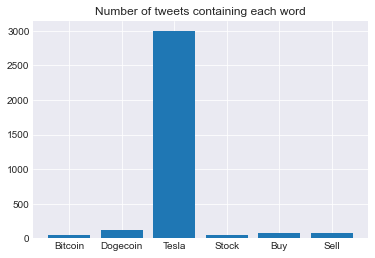

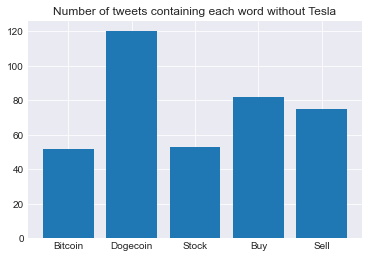

In [102]:
interesting_words = ["Bitcoin", "Dogecoin", "Tesla", "Stock", "Buy", "Sell"]
interesting_regex = ["(bitcoin)|(btc)", "(dogecoin)|(doge)", "(tesla)|(tsla)", "stock", "buy", "sell"]

counts = {}
for word, regex in zip(interesting_words, interesting_regex):
    counts[word] = tweets.tweet.str.lower().str.contains(regex, regex=True).sum()

print(counts)
plt.bar(counts.keys(), counts.values())
plt.title("Number of tweets containing each word")
plt.show()
counts.pop("Tesla")
plt.bar(counts.keys(), counts.values())
plt.title("Number of tweets containing each word without Tesla")
plt.show()

We can see that the word "Tesla" is very common in the tweets (it appears 2995 times), which makes sense as Musk is the CEO of Tesla.

We have 52 tweets containing the word "Bitcoin" and 120 containing the word "Dogecoin".

The words Stock, Buy and Sell are also in the tweets, Stock appears 53 times, Buy appears 82 times and Sell appears 75 times.  

In [135]:
df_time = tweets[1:].resample('M', on='created_at').agg({"id": "count", "nlikes": "sum", "nreplies": "sum", "nretweets": "sum"})
px.bar(df_time, y="id", title="Number of tweets per month").show()
df_time = tweets[1:].resample('Y', on='created_at').agg({"id": "count", "nlikes": "sum", "nreplies": "sum", "nretweets": "sum"})
df_time

,id,nlikes,nreplies,nretweets
created_at,,,,
2011-12-31,42,292466,3966,56745
2012-12-31,272,94609,8671,42700
2013-12-31,422,76942,27712,112383
2014-12-31,188,170540,23554,135279
2015-12-31,328,585180,56696,357512
2016-12-31,753,2229868,116876,723434
2017-12-31,1161,11725423,450452,2526689
2018-12-31,2288,37139538,1161772,4948944
2019-12-31,2932,63530908,1297657,6304778
